In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df=pd.read_csv('data-set for decision tree.csv')

In [5]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [6]:
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


Missing values are replaced with the most frequently occurring value (mode) in each column.

In [7]:
# Step 3: Handle missing values (Replace '?' with the most frequent value in each column)
df.replace("?", np.nan, inplace=True)  # Convert '?' to NaN
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # Replace NaN with mode

C:\Users\LATIF COMPUTERS\AppData\Local\Temp\ipykernel_8892\1451862317.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)  # Replace NaN with mode


Check any Null value

In [8]:
df['workclass'].isnull().sum()
df['education'].isnull().sum()
df['marital.status'].isnull().sum()
df['occupation'].isnull().sum()
df['relationship'].isnull().sum()
df['race'].isnull().sum()
df['sex'].isnull().sum()
df['native.country'].isnull().sum()

0

Numerical data, I convert categorical features using `LabelEncoder()

In [9]:
# Step 4: Encode categorical features
label_encoders={}
for column in df.columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoders[column]=le  # Store encoders for inverse transformation if needed

In [10]:
df.describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.094438,10.298210,2.611836,6.138755,1.446362,3.665858,0.669205,36.417155,0.240810
std,1.107194,3.870264,1.506222,3.972708,1.606771,0.848806,0.470506,6.056047,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,3.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,0.000000
75%,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,1.000000


I divide the dataset into `80% training` and `20% testing` using `train_test_split()`.

In [46]:
from sklearn.model_selection import train_test_split
X=df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country']]
y=df['income']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

I create and train a `DecisionTreeClassifier` using entropy as the criterion

In [47]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [48]:
# Step 8: Make predictions
y_pred = model.predict(X_test)

In [49]:
# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

I check model accuracy and generate a classification report.

In [50]:
print("Accuracy:", accuracy)

Accuracy: 0.8108398587440504


In [51]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4976
           1       0.62      0.51      0.56      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.71      0.72      6513
weighted avg       0.80      0.81      0.80      6513



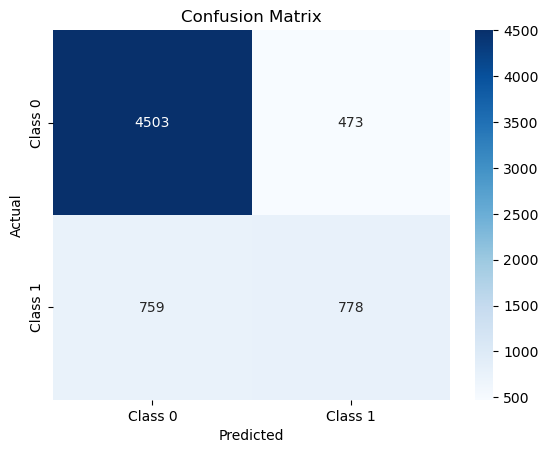

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
print(X.head())  # Check if X has values
print(y.head())  # Check if y has values

   workclass  education  marital.status  occupation  relationship  race  sex  \
0          3         11               6           9             1     4    0   
1          3         11               6           3             1     4    0   
2          3         15               6           9             4     2    0   
3          3          5               0           6             4     4    0   
4          3         15               5           9             3     4    0   

   native.country  
0              38  
1              38  
2              38  
3              38  
4              38  
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32


:
:-->Decision  Tree of the data set

I use `plot_tree()` to display the structure  decision tree.

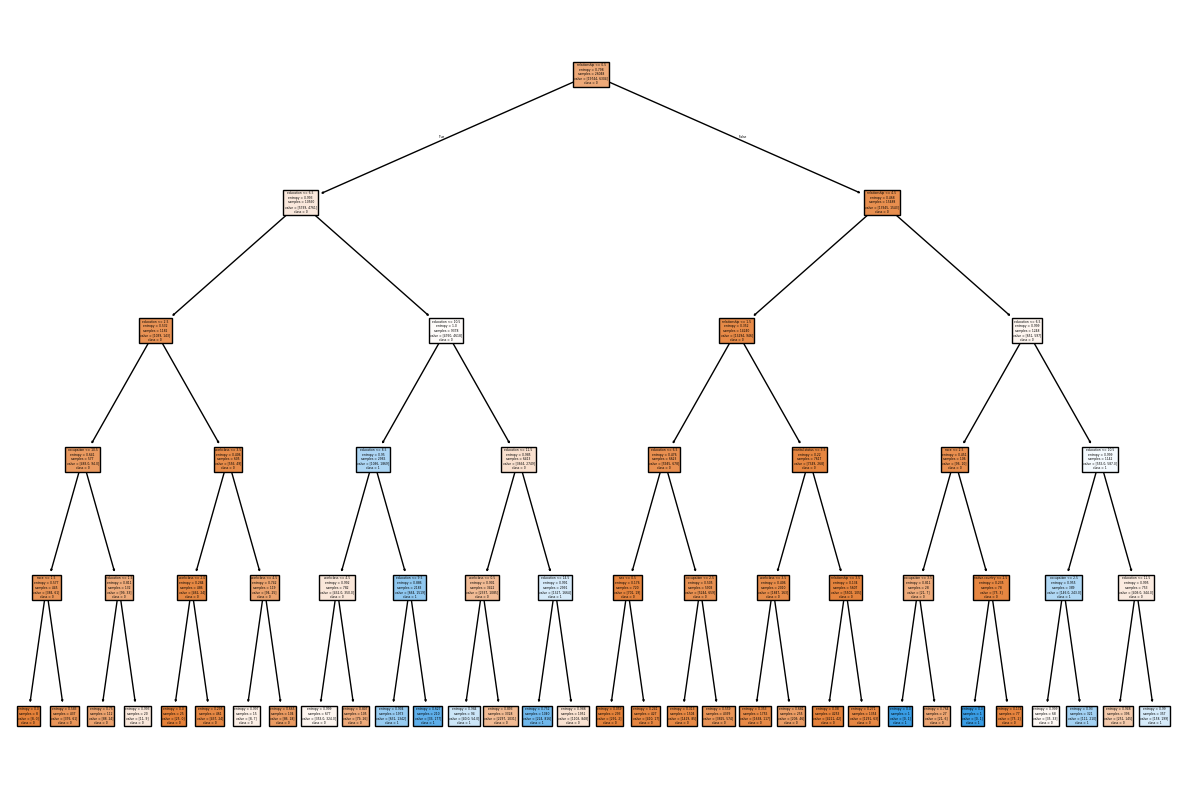

In [54]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True)
plt.show()

Check which features are most important

In [55]:
import pandas as pd
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

relationship      0.702934
education         0.252570
marital.status    0.017278
workclass         0.013491
occupation        0.010486
race              0.001387
sex               0.001039
native.country    0.000815
dtype: float64


In [56]:

# Get feature importance values
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)

# Get the most important feature (Root Node)
root_feature = feature_importance.idxmax()

print("Root Node Feature:", root_feature)


Root Node Feature: relationship
